In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sys
sys.path.append('..')
import src.tools as tools

In [2]:
#RFM Libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import kruskal

#CLTV Libraries:
from datetime import datetime, timedelta,date
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
a = pd.read_csv('../data/Year 2009-2010.csv', encoding='unicode_escape')
b = pd.read_csv('../data/Year 2010-2011.csv', encoding='unicode_escape')
retail = pd.concat([a,b], ignore_index=True)
retail.columns= retail.columns.str.lower()

In [4]:
retail = retail.query("country=='United Kingdom'").reset_index(drop=True)
retail.invoicedate = pd.to_datetime(retail.invoicedate)
retail['year'] = retail.invoicedate.dt.year
retail['month'] = retail.invoicedate.dt.month
retail['week'] = retail.invoicedate.dt.isocalendar().week
retail['day'] = retail.invoicedate.dt.day
retail['hour'] = retail.invoicedate.dt.hour
retail['revenue'] = retail.price * retail.quantity
retail = retail.query("year>2009").reset_index(drop=True)

### Customer Lifetime Value for groups of 3 and 6 months
### RFM Part

In [5]:
m3 = retail[(retail.invoicedate < pd.Timestamp(2011,6,1)) & (retail.invoicedate >= pd.Timestamp(2011,3,1))].reset_index(drop=True)
m6 = retail[(retail.invoicedate >= pd.Timestamp(2011,6,1)) & (retail.invoicedate < pd.Timestamp(2011,12,1))].reset_index(drop=True)

#### Recency, Frequency, Monetary

In [6]:
df_3m = tools.rfm(m3)
#df_6m = tools.rfm(m6)
#df_2y = tools.rfm(retail)

In [7]:
df_3m.head()

,customer id,recency,frequency,monetary
0,14620.0,12,30,393.28
1,14740.0,4,89,1448.21
2,13880.0,25,38,718.63
3,16462.0,91,1,34.00
4,17068.0,11,76,1480.95


AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

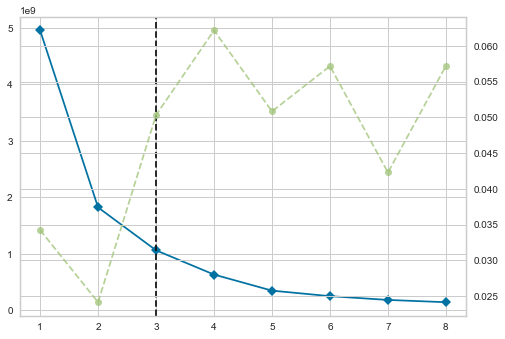

In [8]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,9))
visualizer.fit(df_3m[['recency', 'frequency', 'monetary']])

In [9]:
"""kmeans = KMeans(n_clusters=3)
    
kmeans.fit(df[['recency']])
df['r_cluster'] = kmeans.predict(df[['recency']])
    
kmeans.fit(df[['frequency']])
df['f_cluster'] = kmeans.predict(df[['frequency']])
    
kmeans.fit(df[['monetary']])
df['m_cluster'] = kmeans.predict(df[['monetary']])"""

"kmeans = KMeans(n_clusters=3)\n    \nkmeans.fit(df[['recency']])\ndf['r_cluster'] = kmeans.predict(df[['recency']])\n    \nkmeans.fit(df[['frequency']])\ndf['f_cluster'] = kmeans.predict(df[['frequency']])\n    \nkmeans.fit(df[['monetary']])\ndf['m_cluster'] = kmeans.predict(df[['monetary']])"

#### Determine Optimal Number of Clusters per Dataframe

In [10]:
#tools.rfmclusters(df_3m)

rfm clusters = 2, 3, 3

In [11]:
#tools.rfmclusters(df_6m)

rfm clusters = 3, 3, 3

In [12]:
#tools.rfmclusters(df_2y)

rfm clusters = 2, 3, 3

#### Cluster Analysis

In [13]:
"""df_3m = tools.clustering(df_3m, 3)
df_6m = tools.clustering(df_6m, 3)
df_2y = tools.clustering(df_2y, 3);"""

'df_3m = tools.clustering(df_3m, 3)\ndf_6m = tools.clustering(df_6m, 3)\ndf_2y = tools.clustering(df_2y, 3);'

#### Scoring

In [14]:
'''df_3m = tools.score(df_3m)
df_6m = tools.score(df_6m)
df_2y = tools.score(df_2y);'''

'df_3m = tools.score(df_3m)\ndf_6m = tools.score(df_6m)\ndf_2y = tools.score(df_2y);'

In [15]:
'''fig, ax = plt.subplots(1,3)
sns.countplot(y='score', data=df_3m, ax=ax[0])
sns.countplot(y='score', data=df_6m, ax=ax[1])
sns.countplot(y='score', data=df_2y, ax=ax[2]);'''

"fig, ax = plt.subplots(1,3)\nsns.countplot(y='score', data=df_3m, ax=ax[0])\nsns.countplot(y='score', data=df_6m, ax=ax[1])\nsns.countplot(y='score', data=df_2y, ax=ax[2]);"

#### Segmentation Based on Score

In [16]:
'''df_3m = tools.segmentation(df_3m)
df_6m = tools.segmentation(df_6m)
df_2y = tools.segmentation(df_2y);'''

'df_3m = tools.segmentation(df_3m)\ndf_6m = tools.segmentation(df_6m)\ndf_2y = tools.segmentation(df_2y);'

In [17]:
'''fig, ax = plt.subplots(1,3)
sns.countplot(x='segment', data=df_3m, ax=ax[0])
sns.countplot(x='segment', data=df_6m, ax=ax[1])
sns.countplot(x='segment', data=df_2y, ax=ax[2]);'''

"fig, ax = plt.subplots(1,3)\nsns.countplot(x='segment', data=df_3m, ax=ax[0])\nsns.countplot(x='segment', data=df_6m, ax=ax[1])\nsns.countplot(x='segment', data=df_2y, ax=ax[2]);"

In [18]:
#df_3m.head()

In [19]:
#df_6m.head()

### CLV Part

There is no cost specified in the dataset. That’s why Monetary becomes our CLTV directly.

In [20]:
#print(df_3m.shape[0], df_6m.shape[0])

In [21]:
#df_merge = pd.merge(df_3m, df_6m, how='left').fillna(0)

In [22]:
'''corr = df_3m.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)'''

"corr = df_3m.corr(method='pearson')\ncorr.style.background_gradient(cmap='coolwarm').set_precision(2)"